# Input data

Text(0, 0.5, 'Second feature')

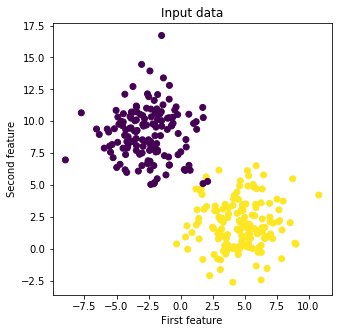

In [2]:
from sklearn.datasets.samples_generator import make_blobs
import matplotlib.pyplot as plt
import numpy as np

X,y = make_blobs(n_samples = 300, random_state = 42, centers = 2, cluster_std = 2)

plt.figure(figsize=(5,5))
plt.title("Input data")
plt.scatter(X[:,0], X[:,1], c = y)
plt.xlabel("First feature")
plt.ylabel("Second feature")

# Train and test separation

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

print("Shape of train data: {}".format(X_train.shape))
print("Shape of test data: {}".format(X_test.shape))

Shape of train data: (225, 2)
Shape of test data: (75, 2)


# Neural network

In [4]:
class MyNet:
    def __init__(self, n_input, n_hidden, n_output, lr = 0.1, bias=True):
        
        self.learning_rate = lr
        self.n_input = n_input
        self.n_hidden = n_hidden
        self.n_output = n_output
        self.bias = bias

        if self.bias:
            self.w1 = np.random.uniform(-1,1, (n_input+1, n_hidden))
            self.w2 = np.random.uniform(-1,1, (n_hidden+1, n_output))
        else:
            self.w1 = np.random.uniform(-1,1, (n_input, n_hidden))
            self.w2 = np.random.uniform(-1,1, (n_hidden, n_output))
        
    # Activation function
    def activation_function(self, data):
        return 1 / (1 + np.exp(-data))

    # Derivative of function
    def derivative_of_function(self, y):
        return y * (1 - y)
        
    # Forward propagation function
    def forward_propagation(self, input_data):
        
        if self.bias:
            input_data = np.append(input_data,1)

        # Between input and hidden layer
        net_on_hidden_layer = np.dot(input_data, self.w1)
        y_on_hidden_layer = self.activation_function(net_on_hidden_layer)
        
        if self.bias:
            y_on_hidden_layer = np.append(y_on_hidden_layer,1)

        # Between hidden and output layer
        net_on_output_layer = np.dot(y_on_hidden_layer, self.w2)
        y_on_output_layer = self.activation_function(net_on_output_layer)

        return y_on_output_layer, y_on_hidden_layer

    # Neural network training
    def neural_network_training(self, input_data, y_true):

        y_on_output_layer, y_on_hidden_layer = self.forward_propagation (input_data)
        
        if self.bias:
            input_data = np.append(input_data,1)

        # Back propagation function (Error-Correction)
        d_output = - y_true/y_on_output_layer + (1-y_true)/(1-y_on_output_layer)  # Loss-function: BCE
        
        if self.bias:
            d_hidden = np.dot(d_output,np.transpose(self.w2[:-1]))
        else:
            d_hidden = np.dot(d_output,np.transpose(self.w2))

        self.w1 = self.w1 - d_hidden * self.derivative_of_function(y_on_hidden_layer[:self.n_hidden]) * self.derivative_of_function(y_on_output_layer) * input_data.reshape(len(input_data),1) * self.learning_rate 
        self.w2 = self.w2 - d_output * self.derivative_of_function(y_on_output_layer) * y_on_hidden_layer.reshape(len(y_on_hidden_layer),1) * self.learning_rate 
    
        return y_on_output_layer

# Neural network training

In [28]:
num_epoch = 100
net = MyNet(2, 3, 1, 0.001, bias=True)
acc_test_array = []
acc_train_array = []
for i in range(0, num_epoch, 1):
    acc_train = 0
    for j in range(0, len(y_train), 1):
        preds = net.neural_network_training(X_train[j], y_train[j])
        pred_class = 1 if preds >= 0.5 else 0
        acc_train += pred_class == y_train[j]
    acc_train = acc_train/len(y_train)      
    y_pred = []
    acc_test = 0
    for k in range(0, len(y_test), 1):
        answer,_ = net.forward_propagation(X_test[k])
        pred_class = 1 if answer >= 0.5 else 0
        y_pred.append(pred_class)
        acc_test += pred_class == y_test[k]
    acc_test = acc_test/len(y_test)
    acc_test_array.append(acc_test)
    acc_train_array.append(acc_train)
    if i % 10 == 0:
        print('Epoch: {} train accuracy: {:.3f}% test accuracy: {:.3f}%'.format(i, acc_train, acc_test))   
    
print("ОК!")

Epoch: 0 train accuracy: 0.498% test accuracy: 0.507%
Epoch: 10 train accuracy: 0.787% test accuracy: 0.840%
Epoch: 20 train accuracy: 0.951% test accuracy: 0.947%
Epoch: 30 train accuracy: 0.964% test accuracy: 0.973%
Epoch: 40 train accuracy: 0.978% test accuracy: 0.973%
Epoch: 50 train accuracy: 0.982% test accuracy: 0.973%
Epoch: 60 train accuracy: 0.982% test accuracy: 0.973%
Epoch: 70 train accuracy: 0.982% test accuracy: 0.973%
Epoch: 80 train accuracy: 0.987% test accuracy: 0.973%
Epoch: 90 train accuracy: 0.991% test accuracy: 0.973%
ОК!


# Accuracy

Final train accuracy: 99.11 %
Final test accuracy: 97.33 %


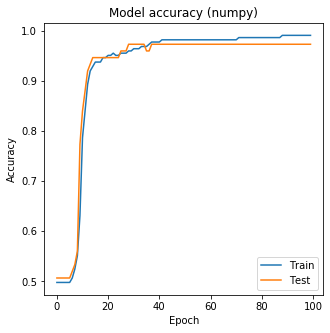

In [35]:
import matplotlib.pyplot as plt 

print("Final train accuracy: {:.2f} %".format(acc_train*100))
print("Final test accuracy: {:.2f} %".format(acc_test*100))

plt.figure(figsize=(5,5))
plt.plot(acc_train_array)
plt.plot(acc_test_array)
plt.title('Model accuracy (numpy)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')

# Results

Text(0, 0.5, 'Second feature')

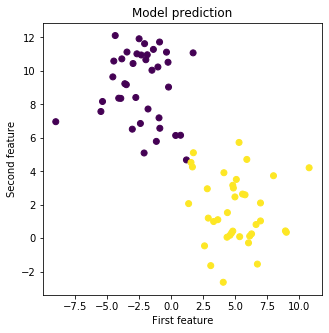

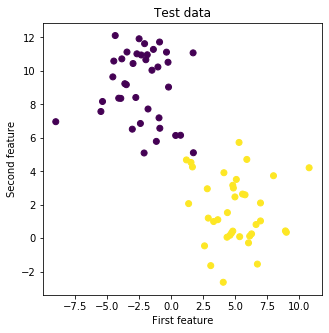

In [30]:
plt.figure(figsize=(5,5))
plt.title("Model prediction")
plt.scatter(X_test[:,0], X_test[:,1], c = y_pred)
plt.xlabel("First feature")
plt.ylabel("Second feature")

plt.figure(figsize=(5,5))
plt.title("Test data")
plt.scatter(X_test[:,0], X_test[:,1], c = y_test)
plt.xlabel("First feature")
plt.ylabel("Second feature")